In [ ]:
# Matplotlib settings

import warnings
import matplotlib.pyplot as plt
#sns.set_style("whitegrid")

plt.rcParams.update({
    'text.usetex': True,          # Enable LaTeX rendering
    'font.family': 'serif',       # Use serif fonts for a classic look
    'font.serif': ['Georgia'],    # Specify a serif font (e.g., Georgia)
    'font.weight': 'bold',      # Specify font weight                           ----------
    'figure.dpi': 200,            # Set the default DPI for clear visuals
    'figure.facecolor': 'white',  # Set the figure background color
    "axes.edgecolor": "grey",     # Border color for axes
    "axes.linewidth": 0.2,        # Border width for axes
    'axes.grid': True,            # Enable grid on axes
    'axes.labelweight': 'bold',       # Axis label bold                         ----------
    'axes.titleweight': 'bold',     # Axis title bold                           ----------
    'grid.color': 'grey',         # Grid color
    'grid.linestyle': '--',       # Dashed grid line style
    'grid.linewidth': 0.3,       # Grid line width
    'grid.alpha': 0.5,            # Grid transparency
    "axes.spines.top": False,     # Remove top spine
    "axes.spines.right": False,   # Remove right spine
    "legend.frameon": True,       # Enable frame around legends
    "legend.framealpha": 0.5      # Legend frame transparency
})

warnings.filterwarnings('ignore')

legend_box = dict(boxstyle="round,pad=0.3", fc="white", ec="0.8", alpha=0.9)

In [ ]:
# Imports
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from SHAP_utils.shap_store import load_shap

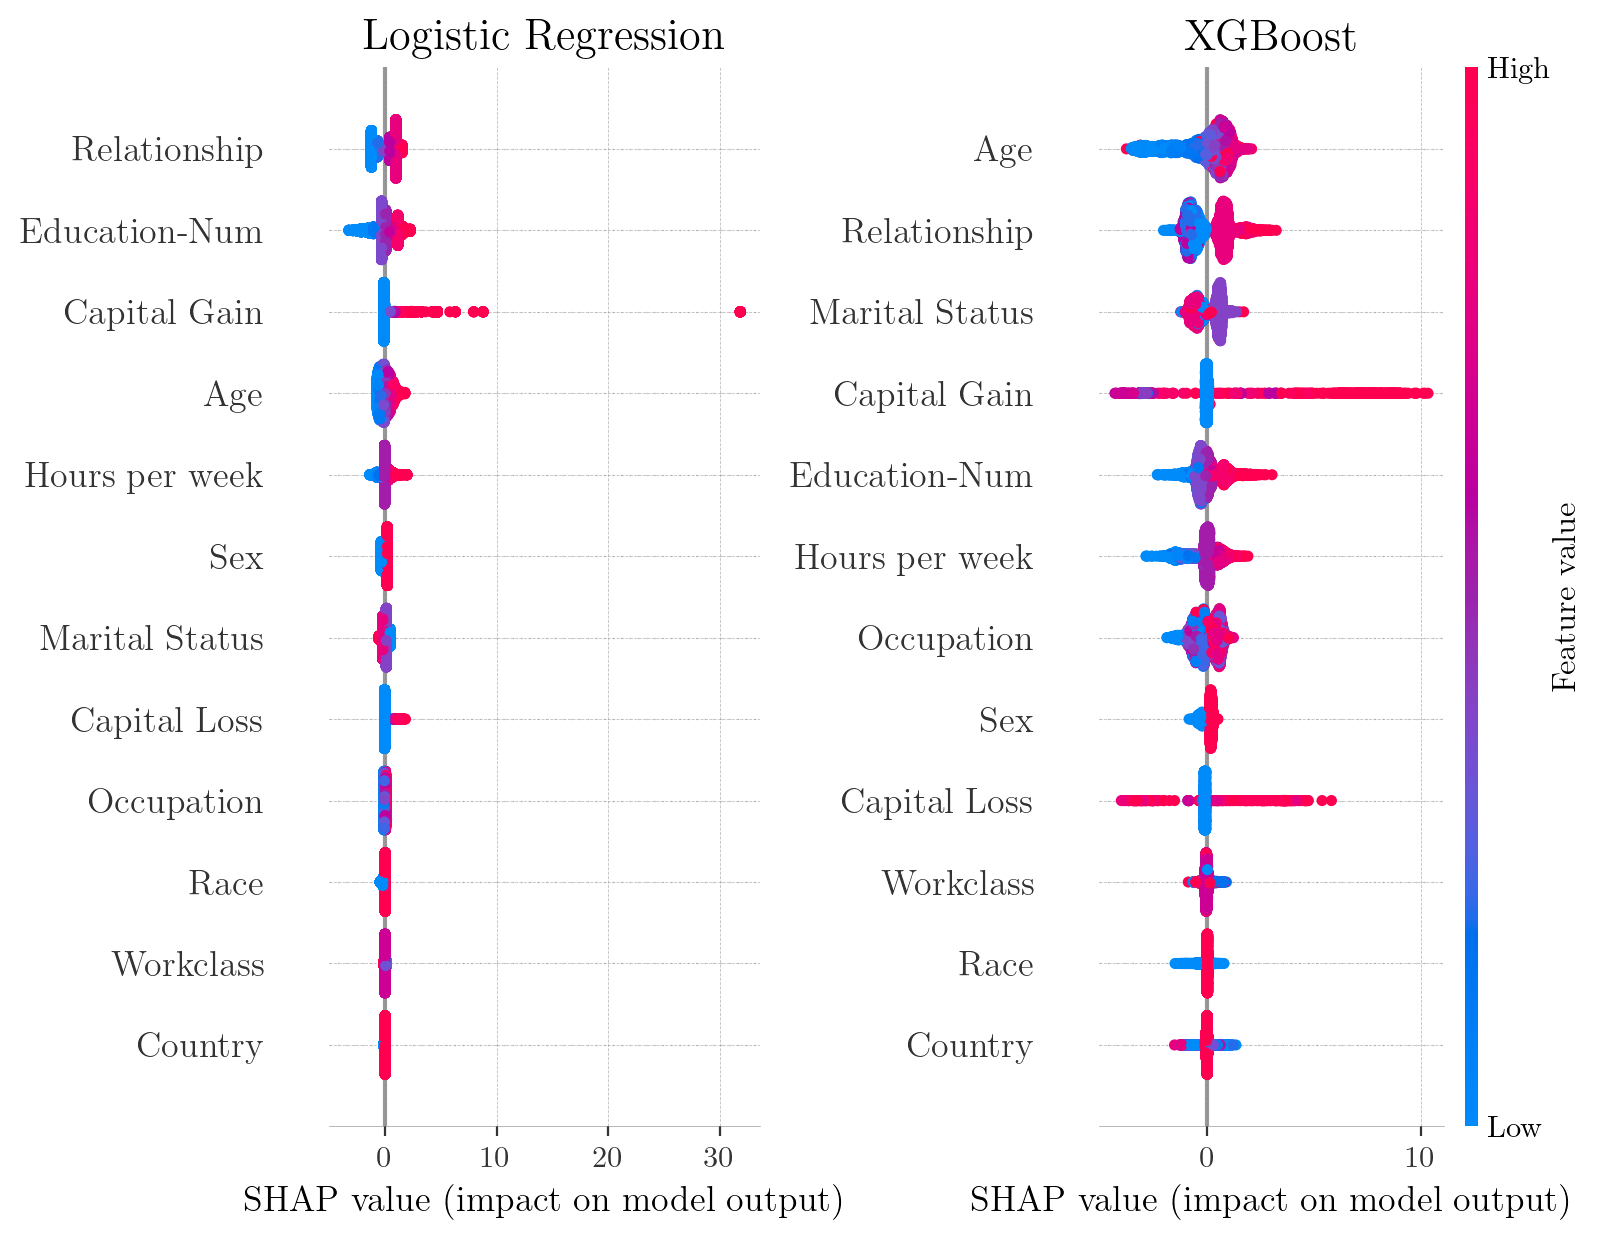


Logistic Regression — SHAP Feature Importance (mean |SHAP|)
           feature  mean_abs_shap
0     Relationship       0.917195
1    Education-Num       0.679165
2     Capital Gain       0.447602
3              Age       0.383199
4   Hours per week       0.264760
5              Sex       0.246689
6   Marital Status       0.213802
7     Capital Loss       0.093638
8       Occupation       0.057266
9             Race       0.056345
10       Workclass       0.024001
11         Country       0.014512

XGBoost — SHAP Feature Importance (mean |SHAP|)
           feature  mean_abs_shap
0              Age       0.870599
1     Relationship       0.796658
2   Marital Status       0.515516
3     Capital Gain       0.484936
4    Education-Num       0.465093
5   Hours per week       0.458493
6       Occupation       0.444062
7              Sex       0.227185
8     Capital Loss       0.222908
9        Workclass       0.090925
10            Race       0.062655
11         Country       0.060435

--- L

In [ ]:
shap_lr_data = load_shap("shap_results/adult_logreg.pkl")
shap_xgb_data = load_shap("shap_results/adult_xgboost.pkl")

shap_values_lr = shap_lr_data["shap_values"]
shap_values_xgb = shap_xgb_data["shap_values"]

feature_names = shap_lr_data["feature_names"]

shap_lr = shap.Explanation(
    values=shap_values_lr,
    base_values=shap_lr_data["base_values"],
    data=shap_lr_data["data"],
    feature_names=feature_names
)

shap_xgb = shap.Explanation(
    values=shap_values_xgb,
    base_values=shap_xgb_data["base_values"],
    data=shap_xgb_data["data"],
    feature_names=feature_names
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

plt.sca(axes[0])
plt.title("Logistic Regression", fontsize=16)
shap.plots.beeswarm(
    shap_lr, 
    show=False, 
    color_bar=False, 
    max_display=12
)

plt.sca(axes[1])
plt.title("XGBoost", fontsize=16)
shap.plots.beeswarm(
    shap_xgb, 
    show=False, 
    color_bar=True, 
    max_display=12
)

plt.tight_layout()
plt.show()

def print_shap_importance(shap_values, feature_names, model_name):
    if isinstance(shap_values, shap.Explanation):
        values = shap_values.values
    else:
        values = shap_values

    mean_abs = np.abs(values).mean(axis=0)

    df = (
        pd.DataFrame({
            "feature": feature_names,
            "mean_abs_shap": mean_abs
        })
        .sort_values("mean_abs_shap", ascending=False)
        .reset_index(drop=True)
    )

    print(f"\n{model_name} — SHAP Feature Importance (mean |SHAP|)")
    print(df)


print_shap_importance(shap_lr, feature_names, "Logistic Regression")
print_shap_importance(shap_xgb, feature_names, "XGBoost")

print("\n--- Logistic Regression Coefficients (Loaded) ---")
if "coefficients" in shap_lr_data.get("extra_meta", {}):
    df_coeffs = shap_lr_data["extra_meta"]["coefficients"]
    print(df_coeffs[['Feature', 'Coefficient']].to_string(index=False))
else:
    print("Coefficients not found in saved file. Run compute_shap_adult.py again.")
    
print("\n--- XGBoost Gain Ranking (Loaded) ---")
if "gain" in shap_xgb_data.get("extra_meta", {}):
    df_gain = shap_xgb_data["extra_meta"]["gain"]
    print(df_gain.to_string(index=False))
else:
    print("Gain data not found in saved file. Run compute_shap_adult.py again.")

Removed 35 outlier(s) from Logistic Regression data for better visualization.


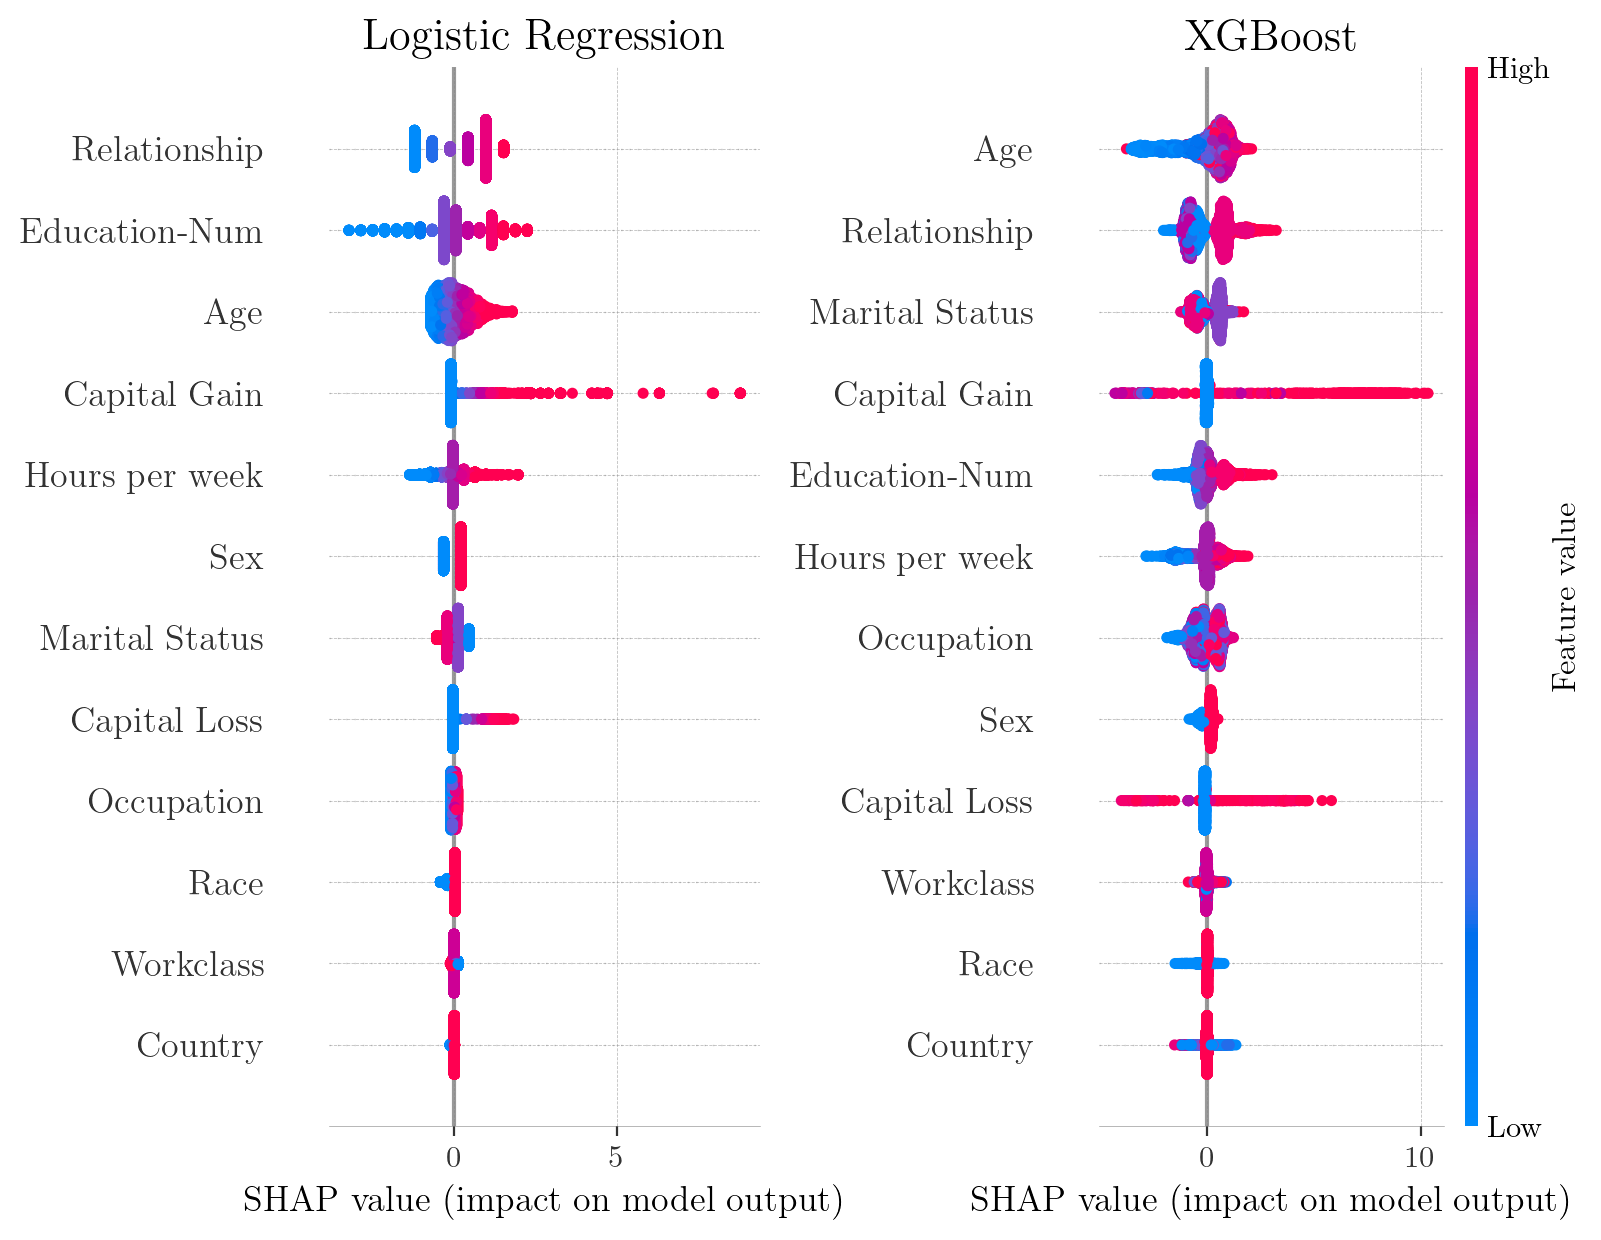


Logistic Regression — SHAP Feature Importance (mean |SHAP|)
           feature  mean_abs_shap
0     Relationship       0.917195
1    Education-Num       0.679165
2     Capital Gain       0.447602
3              Age       0.383199
4   Hours per week       0.264760
5              Sex       0.246689
6   Marital Status       0.213802
7     Capital Loss       0.093638
8       Occupation       0.057266
9             Race       0.056345
10       Workclass       0.024001
11         Country       0.014512

XGBoost — SHAP Feature Importance (mean |SHAP|)
           feature  mean_abs_shap
0              Age       0.870599
1     Relationship       0.796658
2   Marital Status       0.515516
3     Capital Gain       0.484936
4    Education-Num       0.465093
5   Hours per week       0.458493
6       Occupation       0.444062
7              Sex       0.227185
8     Capital Loss       0.222908
9        Workclass       0.090925
10            Race       0.062655
11         Country       0.060435

--- L

In [31]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# You will need your custom loader
from SHAP_utils.shap_store import load_shap

# -----------------------------
# 1. Load saved SHAP results (Adult Dataset)
# -----------------------------
shap_lr_data = load_shap("shap_results/adult_logreg.pkl")
shap_xgb_data = load_shap("shap_results/adult_xgboost.pkl")

# Extract components
shap_values_lr = shap_lr_data["shap_values"]
shap_values_xgb = shap_xgb_data["shap_values"]
feature_names = shap_lr_data["feature_names"]

# Recreate SHAP Explanation objects
shap_lr = shap.Explanation(
    values=shap_values_lr,
    base_values=shap_lr_data["base_values"],
    data=shap_lr_data["data"],
    feature_names=feature_names
)

shap_xgb = shap.Explanation(
    values=shap_values_xgb,
    base_values=shap_xgb_data["base_values"],
    data=shap_xgb_data["data"],
    feature_names=feature_names
)

# -----------------------------
# 2. Filter Outlier in Logistic Regression (Capital Gain)
# -----------------------------
# Identify the index of 'Capital Gain'
if "Capital Gain" in feature_names:
    cap_gain_idx = feature_names.index("Capital Gain")
    
    # Calculate a threshold to identify the extreme outlier (e.g., 99.9th percentile)
    # You can also set a hard limit if you know the exact value, e.g., > 3.0
    threshold = np.percentile(np.abs(shap_lr.values[:, cap_gain_idx]), 99.9)
    
    # Create a boolean mask of rows to KEEP (where Capital Gain SHAP is within limits)
    mask = np.abs(shap_lr.values[:, cap_gain_idx]) < threshold
    
    # Apply mask to the Explanation object to filter out the specific row(s)
    # slicing a shap.Explanation object filters values, base_values, and data automatically
    shap_lr_filtered = shap_lr[mask]
    
    print(f"Removed {len(shap_lr) - len(shap_lr_filtered)} outlier(s) from Logistic Regression data for better visualization.")
else:
    shap_lr_filtered = shap_lr
    print("Feature 'Capital Gain' not found; no filtering applied.")

# -----------------------------
# 3. Plot Side-by-Side SHAP Summary
# -----------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# A. Logistic Regression (Left) - Using the filtered data
plt.sca(axes[0])
plt.title("Logistic Regression", fontsize=16)
shap.plots.beeswarm(
    shap_lr_filtered, 
    show=False, 
    color_bar=False, 
    max_display=12
)

# B. XGBoost (Right) - Using original data
plt.sca(axes[1])
plt.title("XGBoost", fontsize=16)
shap.plots.beeswarm(
    shap_xgb, 
    show=False, 
    color_bar=True, 
    max_display=12
)

plt.tight_layout()
plt.show()

# -----------------------------
# 4. Print SHAP Feature Importance
# -----------------------------
def print_shap_importance(shap_values, feature_names, model_name):
    # Handle case where shap_values is an Explanation object
    if isinstance(shap_values, shap.Explanation):
        values = shap_values.values
    else:
        values = shap_values

    mean_abs = np.abs(values).mean(axis=0)

    df = (
        pd.DataFrame({
            "feature": feature_names,
            "mean_abs_shap": mean_abs
        })
        .sort_values("mean_abs_shap", ascending=False)
        .reset_index(drop=True)
    )

    print(f"\n{model_name} — SHAP Feature Importance (mean |SHAP|)")
    print(df)

# Note: We use the filtered version for stats to align with the chart, 
# or use the original 'shap_lr' if you want the "true" stats including the outlier.
print_shap_importance(shap_lr, feature_names, "Logistic Regression")
print_shap_importance(shap_xgb, feature_names, "XGBoost")

# ==========================================
# 5. Retrieve and Print Saved Coefficients
# ==========================================
print("\n--- Logistic Regression Coefficients (Loaded) ---")
if "coefficients" in shap_lr_data.get("extra_meta", {}):
    df_coeffs = shap_lr_data["extra_meta"]["coefficients"]
    print(df_coeffs[['Feature', 'Coefficient']].to_string(index=False))
else:
    print("Coefficients not found in saved file. Run compute_shap_adult.py again.")

# ==========================================
# 6. Retrieve and Print Saved Gain
# ==========================================
print("\n--- XGBoost Gain Ranking (Loaded) ---")
if "gain" in shap_xgb_data.get("extra_meta", {}):
    df_gain = shap_xgb_data["extra_meta"]["gain"]
    print(df_gain.to_string(index=False))
else:
    print("Gain data not found in saved file. Run compute_shap_adult.py again.")

Loading and preprocessing Adult dataset...
Training baseline XGBoost model...
Baseline ROC AUC: 0.9293
Calculating feature rankings...

Generating Iterative Feature Selection Scores...

################################################################################
SCENARIO: ADD BEST
################################################################################

--- Method: SHAP ---
 Step  Feature_Added  ROC_AUC
    1            Age 0.708135
    2   Relationship 0.821435
    3 Marital Status 0.822753
    4   Capital Gain 0.872346
    5  Education-Num 0.906139
    6 Hours per week 0.910228
    7     Occupation 0.916486
    8            Sex 0.917458
    9   Capital Loss 0.927585
   10      Workclass 0.929237
   11           Race 0.929510
   12        Country 0.929213
------------------------------------------------------------

--- Method: PFI ---
 Step  Feature_Added  ROC_AUC
    1   Capital Gain 0.626112
    2   Relationship 0.843284
    3            Age 0.871529
    4  Education-Nu

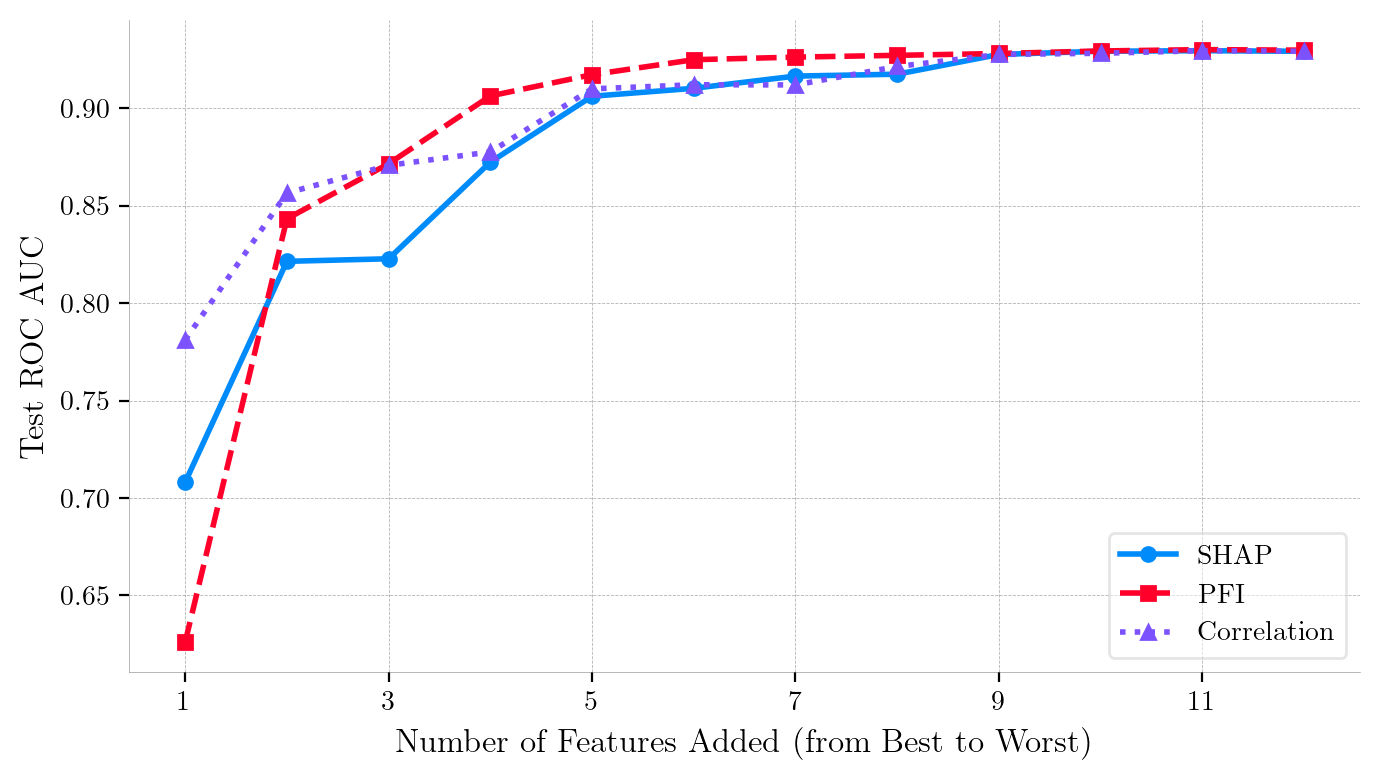

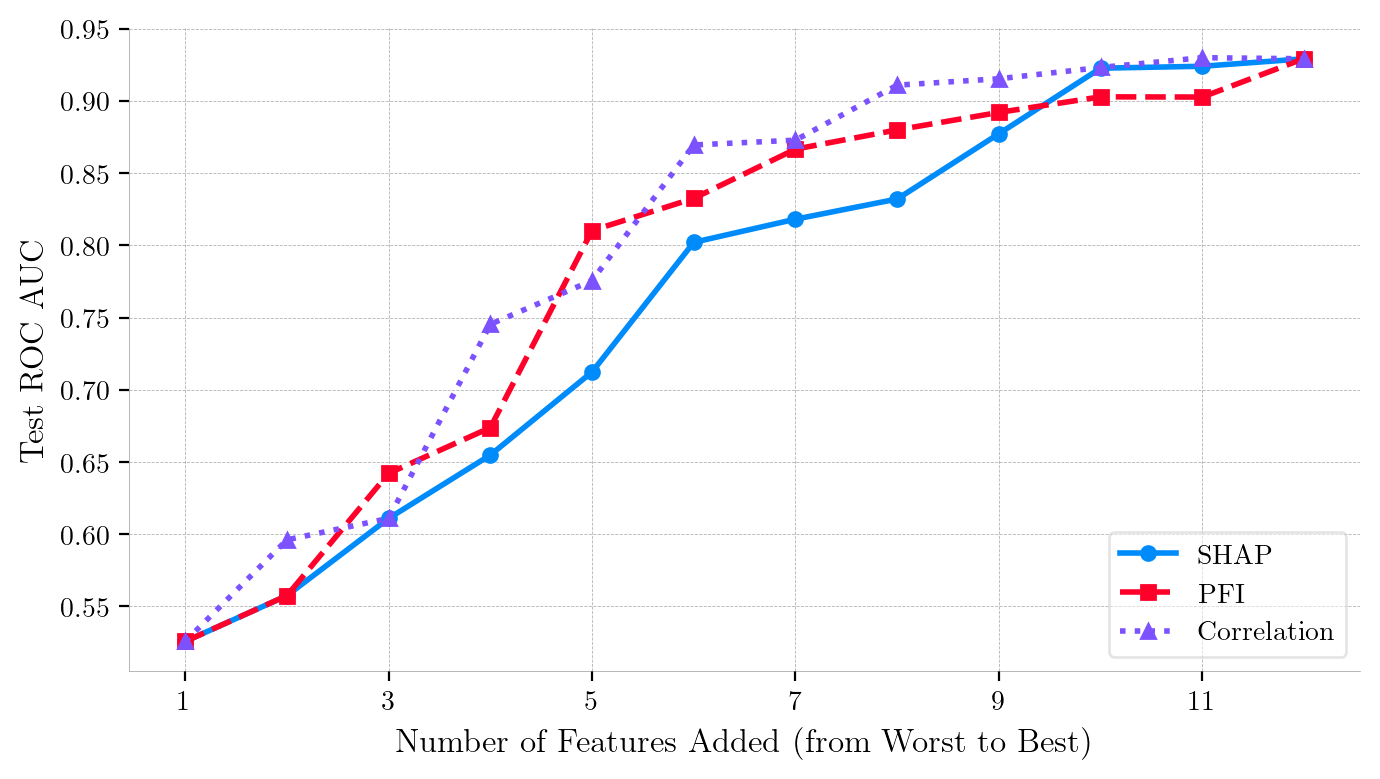

Done.


In [29]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score

# ==========================================
# 1. LOAD & PREPROCESS DATA
# ==========================================
print("Loading and preprocessing Adult dataset...")

X, y = shap.datasets.adult()
X = pd.DataFrame(X, columns=X.columns)
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features only
numeric_cols = X.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# ==========================================
# 2. TRAIN BASELINE MODEL
# ==========================================
print("Training baseline XGBoost model...")

baseline_model = xgb.XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

baseline_model.fit(X_train_scaled, y_train)

baseline_pred = baseline_model.predict_proba(X_test_scaled)[:, 1]
print(f"Baseline ROC AUC: {roc_auc_score(y_test, baseline_pred):.4f}")
print("=" * 70)

# ==========================================
# 3. FEATURE IMPORTANCE RANKINGS
# ==========================================
print("Calculating feature rankings...")

# --- SHAP (Hardcoded Ranking) ---
shap_ranking = [
    "Age", "Relationship", "Marital Status", "Capital Gain", "Education-Num",
    "Hours per week", "Occupation", "Sex", "Capital Loss", "Workclass",
    "Race", "Country"
]

# --- Permutation Feature Importance ---
pfi = permutation_importance(
    baseline_model,
    X_test_scaled,
    y_test,
    n_repeats=15,
    random_state=42,
    scoring="roc_auc",
    n_jobs=-1
)

pfi_ranking = [
    f for _, f in sorted(zip(pfi.importances_mean, feature_names), reverse=True)
]

# --- Pearson Correlation (numeric features only) ---
train_corr = X_train_scaled[numeric_cols].copy()
train_corr["target"] = y_train

corr_values = (
    train_corr.corr()["target"]
    .abs()
    .drop("target")
    .sort_values(ascending=False)
)
corr_ranking = corr_values.index.tolist() + [
    f for f in feature_names if f not in corr_values.index
]

# # --- [NEW] XGBoost Gain ---
# # get_score returns a dict {feature: score}
# gain_dict = baseline_model.get_booster().get_score(importance_type='gain')

# # Create a full DataFrame to handle features that might have 0 gain (missing from dict)
# gain_df = pd.DataFrame({'feature': feature_names})
# gain_df['gain'] = gain_df['feature'].map(gain_dict).fillna(0)
# gain_ranking = gain_df.sort_values('gain', ascending=False)['feature'].tolist()


# Add "Gain" to the main dictionary
rankings = {
    "SHAP": shap_ranking,
    "PFI": pfi_ranking,
    # "Gain": gain_ranking,        # <--- Added here
    "Correlation": corr_ranking
}

# ==========================================
# 4. FEATURE ADDITION TRAJECTORY
# ==========================================
def get_trajectory_data(ranking, mode, X_tr, y_tr, X_te, y_te):
    results = []

    if mode == "add_best":
        ordered = ranking
    elif mode == "add_worst":
        ordered = ranking[::-1]
    else:
        raise ValueError("Unsupported mode")

    for k in range(1, len(ordered) + 1):
        selected = ordered[:k]
        added_feature = ordered[k - 1]

        clf = xgb.XGBClassifier(
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42,
            n_jobs=-1
        )

        clf.fit(X_tr[selected], y_tr)
        preds = clf.predict_proba(X_te[selected])[:, 1]
        score = roc_auc_score(y_te, preds)

        results.append({
            "Step": k,
            "Feature_Added": added_feature,
            "ROC_AUC": score
        })

    return pd.DataFrame(results)

def trajectory_to_xy(df):
    return df["Step"].values, df["ROC_AUC"].values

# ==========================================
# 5. PRINT TABLES
# ==========================================
print("\nGenerating Iterative Feature Selection Scores...\n")

scenarios = ["add_best", "add_worst"]

for mode in scenarios:
    print("#" * 80)
    print(f"SCENARIO: {mode.upper().replace('_', ' ')}")
    print("#" * 80)

    for method, ranking in rankings.items():
        print(f"\n--- Method: {method} ---")
        df = get_trajectory_data(
            ranking, mode,
            X_train_scaled, y_train,
            X_test_scaled, y_test
        )
        print(df.to_string(index=False))
        print("-" * 60)

print("Tables generated.")
print("=" * 80)

# ==========================================
# 6. PLOTTING
# ==========================================
# Updated Colors and Markers
# Gain gets a color distinct from Blue(SHAP), Red(PFI), Purple(Corr).
# Using a deep orange/gold (#E69F00) often found in colorblind-friendly palettes alongside these.
colors = {
    "SHAP": "#008BFB", 
    "PFI": "#FF002B", 
    #"Gain": "#FF009D",       # <--- New Color (Orange/Gold)
    "Correlation": "#7C52FF"
}

markers = {
    "SHAP": "o", 
    "PFI": "s", 
    #"Gain": "D",             # <--- New Marker (Diamond)
    "Correlation": "^"
}

styles = {
    "SHAP": "-", 
    "PFI": "--", 
    #"Gain": "-.",            # <--- New Line Style (Dash-dot)
    "Correlation": ":"
}

plot_scenarios = [
    ("add_best", "Number of Features Added (from Best to Worst)"),
    ("add_worst", "Number of Features Added (from Worst to Best)")
]

print("Generating plots...")

for mode, xlabel in plot_scenarios:
    plt.figure(figsize=(7, 4))

    for method, ranking in rankings.items():
        df = get_trajectory_data(
            ranking, mode,
            X_train_scaled, y_train,
            X_test_scaled, y_test
        )
        xs, ys = trajectory_to_xy(df)

        plt.plot(
            xs, ys,
            label=method,
            color=colors[method],
            marker=markers[method],
            linestyle=styles[method],
            linewidth=2,
            markersize=5
        )

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Test ROC AUC", fontsize=12)
    plt.xticks(range(1, len(feature_names) + 1, 2))
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

print("Done.")

In [18]:
import shap
import pandas as pd
import numpy as np

# Load Adult Dataset
X, y = shap.datasets.adult()
# X is a DataFrame, y is a numpy array (True/False for >50k)

# Create a combined dataframe for easier analysis
df = X.copy()
df['Income_High'] = y # Boolean

print("=== ADULT DATASET DEEP DIVE ===\n")

# 1. Capital Gain Sparsity
zero_gain = (df['Capital Gain'] == 0).mean()
print(f"1. Capital Gain Sparsity:")
print(f"   - Percentage of rows with Capital Gain = 0: {zero_gain:.2%}")
print(f"   - Mean Income (>50k) when Gain = 0: {df[df['Capital Gain'] == 0]['Income_High'].mean():.2%}")
print(f"   - Mean Income (>50k) when Gain > 0: {df[df['Capital Gain'] > 0]['Income_High'].mean():.2%}")
print("-" * 30)

# 2. Sex Analysis (Explaining Red vs Blue SHAP)
# In SHAP plots: Red usually means High Value (1), Blue means Low Value (0)
# We need to check how 'Sex' is encoded.
# In shap.datasets.adult(), Sex is often already numeric (0=Female, 1=Male) or strings.
# Let's inspect the values.
print("2. Sex Analysis:")
print(f"   - Unique values in 'Sex': {df['Sex'].unique()}")
# Assuming standard encoding: 0 = Female, 1 = Male (Verify this in your data!)
# If Male is 1 (Red in SHAP) and associated with higher income:
male_income = df[df['Sex'] == 1]['Income_High'].mean()
female_income = df[df['Sex'] == 0]['Income_High'].mean()
print(f"   - Probability of High Income (Male/1): {male_income:.2%}")
print(f"   - Probability of High Income (Female/0): {female_income:.2%}")
print(f"   - Ratio (Male/Female): {male_income/female_income:.2f}x")
print("-" * 30)

# 3. Relationship Analysis
print("3. Relationship Analysis:")
# Relationship is categorical mapped to integers. We need to see which integer correlates with high income.
# Typically: Husband/Wife are encoded as specific numbers.
rel_stats = df.groupby('Relationship')['Income_High'].agg(['mean', 'count'])
print(rel_stats)
print("-" * 30)

# 4. Age Analysis (Linear vs Non-Linear)
print("4. Age Analysis (Income by Decade):")
df['Age_Decade'] = (df['Age'] // 10) * 10
age_stats = df.groupby('Age_Decade')['Income_High'].mean()
print(age_stats)
# Look for the peak (usually 40s/50s) and the drop off (70s+). 
# This explains why Linear Regression (monotonic) fails compared to XGBoost.

=== ADULT DATASET DEEP DIVE ===

1. Capital Gain Sparsity:
   - Percentage of rows with Capital Gain = 0: 91.67%
   - Mean Income (>50k) when Gain = 0: 20.65%
   - Mean Income (>50k) when Gain > 0: 61.84%
------------------------------
2. Sex Analysis:
   - Unique values in 'Sex': [1 0]
   - Probability of High Income (Male/1): 30.57%
   - Probability of High Income (Female/0): 10.95%
   - Ratio (Male/Female): 2.79x
------------------------------
3. Relationship Analysis:
                  mean  count
Relationship                 
0             0.103070   8305
1             0.063262   3446
2             0.037717    981
3             0.013220   5068
4             0.448571  13193
5             0.475128   1568
------------------------------
4. Age Analysis (Income by Decade):
Age_Decade
10.0    0.001207
20.0    0.063198
30.0    0.268083
40.0    0.371010
50.0    0.386374
60.0    0.267494
70.0    0.190945
80.0    0.102564
90.0    0.186047
Name: Income_High, dtype: float64


Encoding categorical features...
Computing NMI matrix...


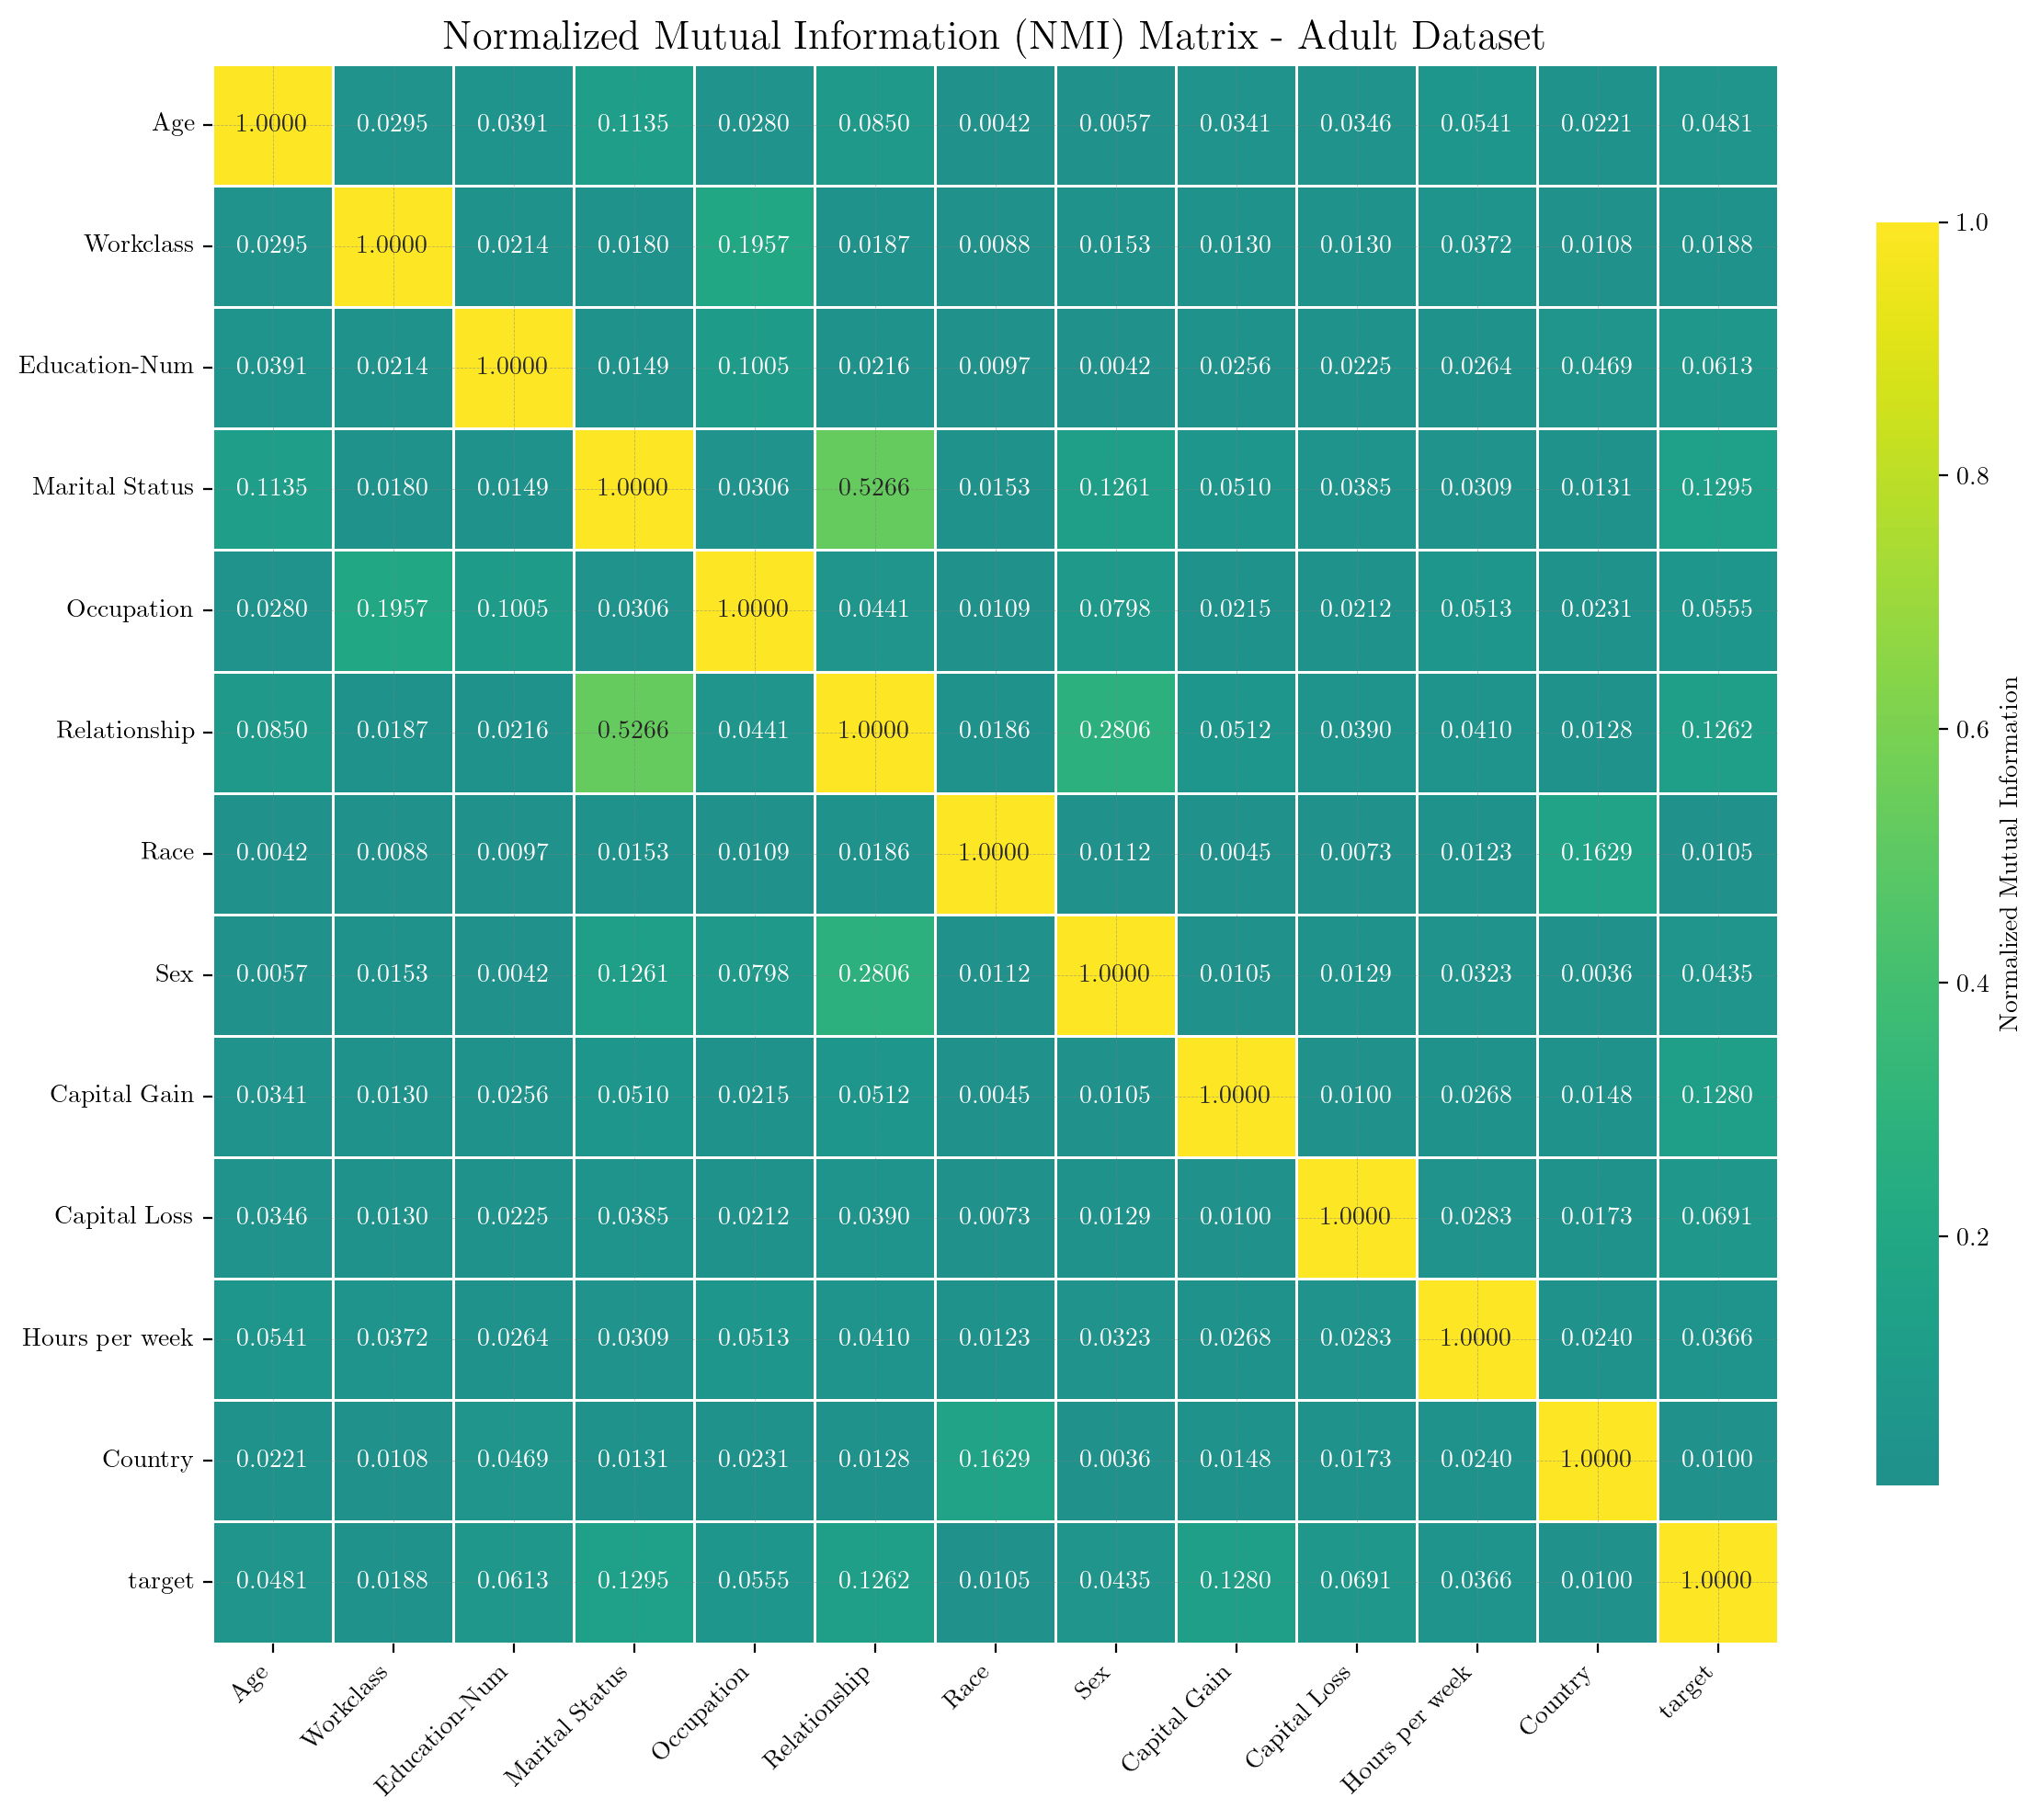

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder
import shap

# --- 1. Your Custom Metrics Functions (FIXED) ---
def freedman_diaconis_bins(x):
    # FIX: Force data to be numeric (float) to handle Booleans (True/False)
    x = np.asarray(x).astype(float)
    
    # Filter NaNs to prevent crashes
    x = x[~np.isnan(x)]
    if len(x) == 0: return 1
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    n = len(x)

    if iqr == 0: 
        return int(np.sqrt(n)) # fallback

    bin_width = 2 * iqr / (n ** (1 / 3))
    if bin_width == 0:
        return int(np.sqrt(n))
        
    bins = int(np.ceil((x.max() - x.min()) / bin_width))
    return max(2, bins)

def shannon_entropy(x, bins):
    x = x[~np.isnan(x)]
    hist, _ = np.histogram(x, bins=bins, density=False)
    prob = hist / hist.sum()
    prob = prob[prob > 0]
    return entropy(prob, base=2)

def mutual_information(x, y, bins_x, bins_y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    
    joint_hist, _, _ = np.histogram2d(x, y, bins=[bins_x, bins_y])
    joint_prob = joint_hist / joint_hist.sum()

    px = joint_prob.sum(axis=1)
    py = joint_prob.sum(axis=0)

    mi = 0.0
    for i in range(joint_prob.shape[0]):
        for j in range(joint_prob.shape[1]):
            if joint_prob[i, j] > 0:
                mi += joint_prob[i, j] * np.log2(
                    joint_prob[i, j] / (px[i] * py[j])
                )
    return mi

def normalized_mutual_information(x, y):
    # Ensure aligned data without NaNs and force to float
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask].astype(float)
    y = y[mask].astype(float)

    bx = freedman_diaconis_bins(x)
    by = freedman_diaconis_bins(y)

    hx = shannon_entropy(x, bx)
    hy = shannon_entropy(y, by)
    mi = mutual_information(x, y, bx, by)

    # if hx + hy == 0: return 0.0
    # return 2 * mi / (hx + hy)
    denominator = np.sqrt(hx * hy)
    if denominator == 0: 
        return 0.0
    return mi / denominator

# --- 2. Load Data ---
X, y = shap.datasets.adult()
df = pd.DataFrame(X, columns=X.columns)
df['target'] = y

# --- 3. Preprocessing ---
print("Encoding categorical features...")
le = LabelEncoder()
for col in df.columns:
    # Check for object, category, OR bool types
    if df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].dtype == 'bool':
        df[col] = le.fit_transform(df[col].astype(str))
    else:
        df[col] = df[col].fillna(df[col].mean())

# --- 4. Compute NMI Matrix ---
print("Computing NMI matrix...")
columns = df.columns
n_cols = len(columns)
nmi_matrix = pd.DataFrame(np.zeros((n_cols, n_cols)), index=columns, columns=columns)

# Loop over pairs (Upper Triangle Only for Speed)
for i in range(n_cols):
    for j in range(i, n_cols):
        col1 = columns[i]
        col2 = columns[j]
        
        # Compute NMI
        val = normalized_mutual_information(df[col1].values, df[col2].values)
        
        # Fill symmetric matrix
        nmi_matrix.loc[col1, col2] = val
        nmi_matrix.loc[col2, col1] = val

# --- 5. Plot Heatmap ---   
plt.figure(figsize=(12, 10))
sns.heatmap(
    nmi_matrix, 
    annot=True, 
    fmt=".4f", 
    cmap='viridis', 
    center=0, 
    linewidths=0.5,
    cbar_kws={"shrink": .8, "label": "Normalized Mutual Information"}
)

plt.title('Normalized Mutual Information (NMI) Matrix - Adult Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
result = nmi_matrix["target"].sort_values(ascending=False)[1:]
print(result.to_string())

Marital Status    0.129531
Capital Gain      0.128050
Relationship      0.126246
Capital Loss      0.069117
Education-Num     0.061255
Occupation        0.055524
Age               0.048095
Sex               0.043527
Hours per week    0.036645
Workclass         0.018830
Race              0.010504
Country           0.010030


In [ ]:
corr_matrix[]